In [3]:
from tensorflow.keras.datasets import imdb
(train_in,train_target),(test_in,test_target) =  imdb.load_data(num_words=500)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(train_in, train_target,test_size=0.2,random_state=42)

In [6]:
import numpy as np
lengths =  np.array([ len(se) for se in x_train])

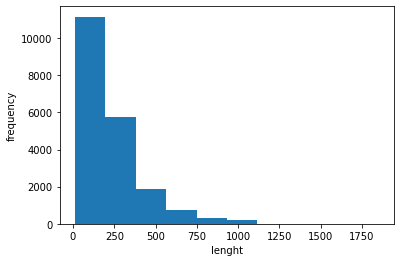

In [8]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lenght')
plt.ylabel('frequency')
plt.show()

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(x_train,maxlen=100)
train_seq.shape

(20000, 100)

In [15]:
val_seq = pad_sequences(x_test,maxlen=100)
val_seq.shape

(5000, 100)

In [47]:
train_oh = keras.utils.to_categorical(train_seq[:10000])
train_oh.shape

(10000, 100, 500)

In [23]:
val_seq.shape

(5000, 100)

In [48]:
val_oh = keras.utils.to_categorical(val_seq[:2500])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [73]:
from tensorflow import keras
train_oh = keras.utils.to_categorical(train_seq[:10000])
val_oh = keras.utils.to_categorical(val_seq[:2500])

model =  keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0004)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cd = keras.callbacks.ModelCheckpoint('best-simple-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model.fit(train_oh,y_train[:10000],epochs=100,batch_size=64,
                  validation_data=(val_oh,y_test[:2500]),
                 callbacks=[checkpoint_cd,early_stopping_cb])

Epoch 1/100
157/157 [==============================] - 5s 29ms/step - loss: 0.6991 - accuracy: 0.5001 - val_loss: 0.6953 - val_accuracy: 0.5168
Epoch 2/100
157/157 [==============================] - 4s 26ms/step - loss: 0.6829 - accuracy: 0.5597 - val_loss: 0.6714 - val_accuracy: 0.5960
Epoch 3/100
157/157 [==============================] - 4s 26ms/step - loss: 0.6488 - accuracy: 0.6462 - val_loss: 0.6461 - val_accuracy: 0.6424
Epoch 4/100
157/157 [==============================] - 4s 26ms/step - loss: 0.6146 - accuracy: 0.6918 - val_loss: 0.6200 - val_accuracy: 0.6796
Epoch 5/100
157/157 [==============================] - 4s 27ms/step - loss: 0.5781 - accuracy: 0.7310 - val_loss: 0.5849 - val_accuracy: 0.7088
Epoch 6/100
157/157 [==============================] - 4s 27ms/step - loss: 0.5467 - accuracy: 0.7567 - val_loss: 0.5748 - val_accuracy: 0.7200
Epoch 7/100
157/157 [==============================] - 4s 25ms/step - loss: 0.5200 - accuracy: 0.7717 - val_loss: 0.5972 - val_accuracy:

In [59]:
train_oh.shape, y_train[:10000].shape

((10000, 100, 500), (10000,))

In [60]:
val_oh.shape,y_test[:2500].shape

((2500, 100, 500), (2500,))

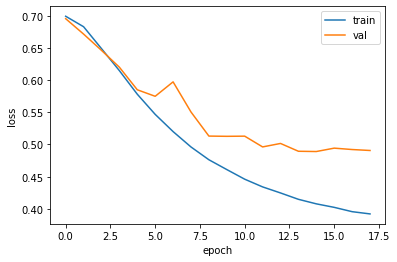

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [75]:
# 원핫인코딩으로 데이터를 변환, 토큰1개가 500차원 -> 입력데이터의 크기가 증가.
# 단어 임베딩
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [67]:
train_seq.shape

(20000, 100)

In [76]:
from tensorflow import keras

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0004)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cd = keras.callbacks.ModelCheckpoint('best-RNN-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model2.fit(train_seq,y_train,epochs=100,batch_size=64,
                  validation_data=(val_seq,y_test),
                 callbacks=[checkpoint_cd,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6536 - accuracy: 0.6425 - val_loss: 0.6005 - val_accuracy: 0.7322
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5591 - accuracy: 0.7500 - val_loss: 0.5596 - val_accuracy: 0.7226
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4915 - accuracy: 0.7832 - val_loss: 0.5058 - val_accuracy: 0.7588
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4617 - accuracy: 0.7927 - val_loss: 0.4637 - val_accuracy: 0.7852
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4462 - accuracy: 0.7993 - val_loss: 0.4718 - val_accuracy: 0.7788
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4361 - accuracy: 0.8064 - val_loss: 0.4672 - val_accuracy: 0.7820
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4267 - accuracy: 0.8087 - val_loss: 0.5102 - val_accuracy:

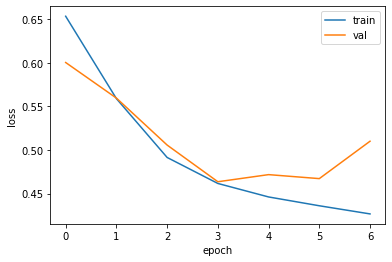

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [78]:
# LSTM  신경망
# RNN 신경망과 관련된정보와 그 정보를 사용하는 지점사이의 거리가 멀경우 역전파할때 그래디언트가 점차 소멸
# 성능이 떨어지는문제가 있음 
# LSTM RNN에서 그래디언트 소멸문제를 해결하기위해서. 각각의 뉴런사이에 HIDEEN STATE 상태 값을 저장하는 
# 구조를 만들어서  사용

In [79]:
(x_train,y_train),(x_test,y_test) =  imdb.load_data(num_words=500)

In [80]:
x_train_split,x_test_split,y_train_split,y_test_split =  train_test_split(x_train,y_train,test_size=0.2, random_state=42)

In [81]:
train_seq= pad_sequences(x_train_split,maxlen=100)
val_seq = pad_sequences(x_test_split,maxlen=100)

In [82]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8))
model3.add(keras.layers.Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [84]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0004)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cd = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model3.fit(train_seq,y_train_split,epochs=100,batch_size=64,
                  validation_data=(val_seq,y_test_split),
                 callbacks=[checkpoint_cd,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6738 - accuracy: 0.6038 - val_loss: 0.6190 - val_accuracy: 0.7056
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5757 - accuracy: 0.7416 - val_loss: 0.5474 - val_accuracy: 0.7512
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5126 - accuracy: 0.7764 - val_loss: 0.4992 - val_accuracy: 0.7764
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.4712 - accuracy: 0.7942 - val_loss: 0.4713 - val_accuracy: 0.7976
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.4492 - accuracy: 0.7995 - val_loss: 0.4507 - val_accuracy: 0.7946
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.4357 - accuracy: 0.8052 - val_loss: 0.4482 - val_accuracy: 0.7926
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.4265 - accuracy: 0.8077 - val_loss: 0.4444 - val_accuracy:

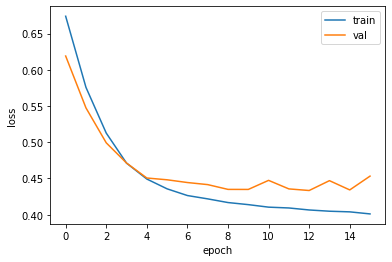

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()